In [2]:
import numpy as np
import math
import Bio
import matplotlib.pyplot as plt

In [3]:
score_matrix = np.array([[-math.inf, -1, -1, -1, -1],
                         [-1, 1, -1, -1, -1],
                         [-1, -1, 1, -1, -1],
                         [-1, -1, -1, 1, -1],
                         [-1, -1, -1, -1, 1]])

def smtx(a,b):
    if a == "-":
        if b == "-":
            return -math.inf
        return -0.5
    if a == b:
        return 1
    if b == "-":
        return -0.5
    else:
        return 0

testo = "GCATGCA"
testt = "GATTACA"

NWA now seems to work, just need to implement backtracking algorithmically to find optimal alignment/solution

In [4]:
def NWA(seqa,seqb,fact):
    grid = np.zeros((len(seqa)+1,len(seqb)+1))
    bgrid = np.zeros((len(seqa)+1,len(seqb)+1),"U1")
    srow = []
    for i in range(len(seqb)+1):
        srow.append(0-fact*i)
    for i in range(len(seqa)+1):
        grid[i][0] = 0-fact*i
    grid[0] = srow
    midgrid = grid[1:,1:]
    for x in range(1,len(seqa)+1):
        for y in range(1,len(seqb)+1):
            bestcand = [(grid[x-1][y-1]+smtx(seqa[x-1],seqb[y-1])),
                             (grid[x-1][y]+smtx(seqa[x-1],"-")),
                             (grid[x][y-1]+smtx("-",seqb[y-1]))]
            grid[x][y] = max(bestcand)
            if max(bestcand)==bestcand[0]:
                bgrid[x][y] = "d"
            elif max(bestcand)==bestcand[1]:
                bgrid[x][y] = "u"
            else:
                bgrid[x][y] = "l"
    print(grid)
    print(bgrid)
    
    return grid, bgrid

^^THIS IS RIGHT - IT BUILDS THE CORRECT MATRIX

In [5]:
test, testdir = NWA(testo,testt,1)

[[ 0.  -1.  -2.  -3.  -4.  -5.  -6.  -7. ]
 [-1.   1.   0.5  0.  -0.5 -1.  -1.5 -2. ]
 [-2.   0.5  1.   0.5  0.  -0.5  0.  -0.5]
 [-3.   0.   1.5  1.   0.5  1.   0.5  1. ]
 [-4.  -0.5  1.   2.5  2.   1.5  1.   0.5]
 [-5.  -1.   0.5  2.   2.5  2.   1.5  1. ]
 [-6.  -1.5  0.   1.5  2.   2.5  3.   2.5]
 [-7.  -2.  -0.5  1.   1.5  3.   2.5  4. ]]
[['' '' '' '' '' '' '' '']
 ['' 'd' 'l' 'l' 'l' 'l' 'l' 'l']
 ['' 'u' 'd' 'd' 'd' 'd' 'd' 'l']
 ['' 'u' 'd' 'd' 'd' 'd' 'l' 'd']
 ['' 'u' 'u' 'd' 'd' 'l' 'd' 'd']
 ['' 'u' 'u' 'u' 'd' 'd' 'd' 'd']
 ['' 'u' 'u' 'u' 'd' 'd' 'd' 'l']
 ['' 'u' 'd' 'u' 'd' 'd' 'd' 'd']]


In [6]:
def optPath(mtx, mtxdir, wrd1, wrd2):
    outgrid = np.zeros(mtx.shape)
    reverse = []
    char1 = len(wrd1)-1
    char2 = len(wrd2)-1
    print(char1,char2)
    print(wrd1[char1],wrd2[char2])
    x = mtx.shape[0]-1
    y = mtx.shape[1]-1
    #left = mtx[x][y-1]
    #up = mtx[x-1][y]
    #diag = mtx[x-1][y-1]
    #if diag>=up and diag>=left:
    #    reverse.append([wrd1[char1],wrd2[char2]])
    #    char1 = char1-1
    #    char2 = char2-1
    #elif up>=left:
        
    while not(x==0 and y==0):
        left = mtx[x][y-1]
        up = mtx[x-1][y]
        diag = mtx[x-1][y-1]
        #print(y,x)
        #print(up,left,diag)
        outgrid[x][y] = 1
        if mtxdir[x][y]=="d":
            x=x-1
            y=y-1
            reverse.append([wrd1[char1],wrd2[char2]])
            char1 = char1-1
            char2 = char2-1
        elif mtxdir[x][y]=="u":
            x=x-1
            reverse.append(["-",wrd2[char2]])
            char2 = char2-1
        else:
            y=y-1
            reverse.append([wrd1[char1],"-"])
            char1 = char1-1
    print(reverse)
    return reverse, outgrid

In [7]:
optPath(test, testdir, testo, testt)

6 6
A A
[['A', 'A'], ['C', 'C'], ['G', 'A'], ['T', 'T'], ['A', 'T'], ['C', 'A'], ['G', 'G']]


([['A', 'A'],
  ['C', 'C'],
  ['G', 'A'],
  ['T', 'T'],
  ['A', 'T'],
  ['C', 'A'],
  ['G', 'G']],
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]))

^^THIS IS WRONG - IT GETS THE WRONG MATCHINGS

In [8]:
p = "CAGAGG"
q = "CATGAG"
grid, griddir = NWA(q,p,0.5)

[[ 0.  -0.5 -1.  -1.5 -2.  -2.5 -3. ]
 [-0.5  1.   0.5  0.  -0.5 -1.  -1.5]
 [-1.   0.5  2.   1.5  1.   0.5  0. ]
 [-1.5  0.   1.5  2.   1.5  1.   0.5]
 [-2.  -0.5  1.   2.5  2.   2.5  2. ]
 [-2.5 -1.   0.5  2.   3.5  3.   2.5]
 [-3.  -1.5  0.   1.5  3.   4.5  4. ]]
[['' '' '' '' '' '' '']
 ['' 'd' 'l' 'l' 'l' 'l' 'l']
 ['' 'u' 'd' 'l' 'd' 'l' 'l']
 ['' 'u' 'u' 'd' 'd' 'd' 'd']
 ['' 'u' 'u' 'd' 'd' 'd' 'd']
 ['' 'u' 'd' 'u' 'd' 'l' 'd']
 ['' 'u' 'u' 'd' 'u' 'd' 'd']]


In [9]:
optPath(grid, griddir, q, p)

5 5
G G
[['G', 'G'], ['A', '-'], ['G', 'G'], ['T', 'A'], ['-', 'G'], ['A', 'A'], ['C', 'C']]


([['G', 'G'],
  ['A', '-'],
  ['G', 'G'],
  ['T', 'A'],
  ['-', 'G'],
  ['A', 'A'],
  ['C', 'C']],
 array([[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]))

In [10]:
actual1 = "CAAAGACCTGAAGAGCCAGTGGACTCCACCCCACTTTCTGGTCTGACCAATT"
actual2 = "ACCACACTCTCTGGGCTGACCAATTACAGCGCTTCTACAGAACTGAAGACTCC"

grid, bgrid = NWA(actual1,actual2,0.5)

[[  0.   -0.5  -1.  ... -25.5 -26.  -26.5]
 [ -0.5   0.    0.5 ... -24.  -24.5 -25. ]
 [ -1.    0.5   0.  ... -22.5 -23.  -23.5]
 ...
 [-25.  -23.5 -22.  ...  21.5  21.   20.5]
 [-25.5 -24.  -22.5 ...  23.   22.5  22. ]
 [-26.  -24.5 -23.  ...  22.5  23.   22.5]]
[['' '' '' ... '' '' '']
 ['' 'd' 'd' ... 'l' 'd' 'd']
 ['' 'd' 'd' ... 'l' 'l' 'l']
 ...
 ['' 'd' 'u' ... 'd' 'd' 'd']
 ['' 'u' 'u' ... 'd' 'l' 'l']
 ['' 'u' 'u' ... 'd' 'd' 'd']]


52 51
C T
[['C', 'T'], ['C', '-'], ['T', 'T'], ['C', 'A'], ['A', 'A'], ['G', 'C'], ['A', 'C'], ['A', 'A'], ['G', 'G'], ['T', 'T'], ['C', 'C'], ['A', 'T'], ['A', 'G'], ['G', 'G'], ['A', 'T'], ['C', 'C'], ['A', '-'], ['T', 'T'], ['C', '-'], ['T', 'T'], ['T', 'T'], ['C', 'C'], ['G', 'A'], ['C', 'C'], ['G', 'C'], ['A', 'C'], ['C', 'C'], ['A', 'A'], ['T', 'C'], ['-', 'C'], ['T', 'T'], ['A', 'C'], ['A', 'A'], ['C', 'G'], ['C', 'G'], ['A', 'T'], ['G', 'G'], ['T', 'A'], ['C', 'C'], ['G', 'C'], ['G', 'G'], ['-', 'A'], ['G', 'G'], ['T', 'A'], ['C', 'A'], ['-', 'G'], ['T', 'T'], ['C', 'C'], ['T', '-'], ['C', 'C'], ['A', 'A'], ['C', 'G'], ['A', 'A'], ['C', 'A'], ['C', 'A'], ['A', 'C']]


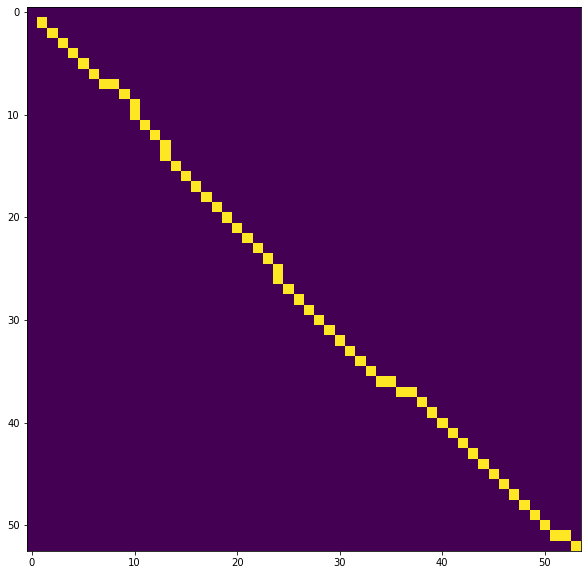

In [13]:
rawpath, outgrid = optPath(grid,bgrid,actual2,actual1)
fig = plt.figure(figsize=(10,10))
plt.imshow(outgrid)

In [14]:
rawpath = np.array(rawpath)
patha = rawpath[:,0]
pathb = rawpath[:,1]
#print(patha)
#print(pathb)
patha = patha[::-1]
pathb = pathb[::-1]
stra = ""
strb = ""
for a in patha:
    stra = stra+a
print(stra)
for b in pathb:
    strb = strb+b
print(strb)

ACCACACTCT-CTG-GGCTGACCAAT-TACAGCGCTTCTACAGAACTGAAGACTCC
CAAAGAC-CTGAAGAGCCAGTGGACTCCACCCCACTT-T-CTGGTCTGACCAAT-T
